In [1]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

## Basis Matrix for Two-Dimensional Subspace

In [2]:
#Creates a 3X2 matrix whose entries are drawn from a Gaussian Distro
A = np.random.randn(3,2)

#Printing the rank of matrix A
rank_A = np.linalg.matrix_rank(A)
print("The rank of matrix A is {}".format(rank_A))

The rank of matrix A is 2


#### The dimension of the column space $\mathbb{S}$ is always equal to the rank which in this case is 2

## Generation of Dataset

In [3]:
#Creating 250 iid random 2X1 matrices v, using np.random.randn(2,) to ensure that its a 1D array
vs = [np.random.randn(2,) for i in range(0,250)]

#Generating the 250 3X1 data samples x 
data_samples = [A.dot(v) for v in vs]

In [4]:
#Converts the data_samples from a list of numpy arrays into its own 2D numpy array
X = np.stack(data_samples)

In [5]:
X.shape

(250, 3)

In [6]:
#Finding rank of matrix X
np.linalg.matrix_rank(X)

2

## Singular Value and Eigenvalue Decomposition of Dataset

In [7]:
#Finding the SVD of matrix X
u, s, vh = np.linalg.svd(X)
#Finding the eigendecomposition of XTX
x_trans_x = X.transpose().dot(X)
lamdas, eigvectors = np.linalg.eigh(x_trans_x)

In [8]:
print(eigvectors)

[[ 0.92702924 -0.17934738  0.32931946]
 [ 0.0809376  -0.76181262 -0.64272127]
 [ 0.36615009  0.62247574 -0.69170663]]


In [9]:
print(vh.transpose())

[[ 0.32931946 -0.17934738 -0.92702924]
 [-0.64272127 -0.76181262 -0.0809376 ]
 [-0.69170663  0.62247574 -0.36615009]]


In [10]:
np.square(s)

array([3.14458720e+03, 4.23459415e+02, 3.73028683e-30])

In [11]:
lamdas

array([2.40685113e-13, 4.23459415e+02, 3.14458720e+03])

#### It's obvious that the square of the singular values is equal to the eigenvalues of $X^{T}$ because all the numbers match up except for the first element in the eigenvalues and the last in the square of the singular values, this is due to the finite precision of computers but in reality these numbers are just 0

In [12]:
#Checking energy is equal to sum of squares of singular values of X
energy_X = (np.linalg.norm(X))**2
sum_sqr_singularvals = np.sum(np.square(s))

print('The forbenius norm of X is {} and the sum of the square of the singular values is {}'
      .format(energy_X, sum_sqr_singularvals))

The forbenius norm of X is 3568.0466188039168 and the sum of the square of the singular values is 3568.046618803917


#### The eigenvectors and eigenvalues of the sample covariance matrix $\hat{C}:=\frac{1}{n}X^{T}X$ are equal to eigenvalues and eigenvectors of $X^{T}X$ except for a factor of $\frac{1}{n}$ which is insifnificant in our stated optimization problem for PCA

In [13]:
#Singular values of X
s

array([5.60766190e+01, 2.05781295e+01, 1.93139505e-15])

#### - We can see here that the last value in the singular values is not exactly 0 this is due to the limitations of computers because they have only finite precision so whenever some arithmetic is done there is a small residual left over that gets carried over through all the operations being done on that piece of data

#### - The two largest singular vectors of $X$ are the basis for the subspace $\mathbb{S}$ because there are only 2 independent vectors and also looking at the SVD of $X$ it's $X=USV^{T}$ the $US$ matrix can be combined to a single matrix let's denote it at $R$ with so then $X=RV^{T}$ this form makes it very obvious that the rows of $X$ are simply linear combinations of the rows of $V^{T}$ because $R$ multiplies on the left. Therefore the rows of $X$ are just composed of linear combinations of the rows $V^{T}$ so the row space of $X$ must be equal to the row space of $V^{T}$ which in really the columns space of $V$ so the first 2 signular vectors are the basis for the subspace.

## PCA of Dataset: PCA Features, Reconstruction, and Error

#### Only 2 principle components are actually necessary to describe the variation in the data because while the data is 3 x 250 its rank is only 2 which means the subspace it describes is just 2 dimensional

In [14]:
rand_x = np.random.randn(3,1)
np.mean(rand_x)

0.07383385486699366

In [15]:
mu_hat = np.mean(X, axis = 0)

#### As we can see the means are indeed small and close to 0

#### The top principal component directions or loading vectors form the solution to the optimization problem posed by PCA the top $k$ right singular vectors of $X$ become the rows of our matrix $M$ used to reduce the dimensionality of our dataset from $p$ to $k$ where $k \leq p$

In [16]:
U = vh.transpose()[:, [0,1]]
U

array([[ 0.32931946, -0.17934738],
       [-0.64272127, -0.76181262],
       [-0.69170663,  0.62247574]])

#### The projection of our original data matrix $X$ unto the new solution of our PCA problem returns back the PRINCIPLE COMPONENTS of $X$ or the "principle features"

In [17]:
#This operation takes the loading vectors or the principle component directions and puts them as the rows in M
M = U.transpose()
#We multiply M with X transpose because we are multiplying M by each ROW in X
X_tilda = M.dot(X.transpose())

#### The reconstruction(approximate) of the original data samples $x_{i}$ is found by projecting the principal features back

In [18]:
#The transpose at the end is necessary in order to keep the convention of each row containing a data sample
X_hat = (U.dot(X_tilda)).transpose()

In [19]:
rep_error = (np.linalg.norm(X_hat-X))**2
rep_error

5.79650890925618e-28

#### The error is practically 0 as expected

In [20]:
#Top loading vector/Principle component direction
top_PCD = U[:,0]
X_topPCD = (top_PCD.dot(X.transpose())).transpose()

In [21]:
top_PCD = top_PCD.reshape(3,1)
X_hat_topPCD = (top_PCD.dot(top_PCD.transpose()).dot(X.transpose())).transpose()

In [22]:
rep_error_topPCD = (1/250)*np.linalg.norm(X_hat_topPCD-X)**2
rep_error_topPCD

1.693837661386329

In [23]:
#Extracting the second singular value
sigma2 = s[1]
(sigma2**2)/250

1.6938376613863284

#### Clearly the new representation error is $\frac{1}{n}$ of the square of the second singular value 

#### Plotting the original data on a 3D scatterplot

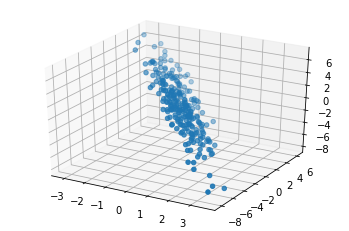

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0],X[:,1], X[:,2])

#### Plotting the reconstructed data corresponding to the top principal component

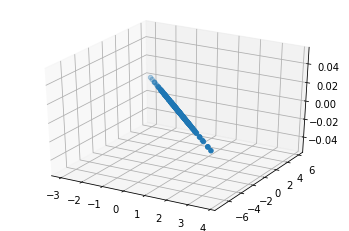

In [25]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')

ax1.scatter(X_hat_topPCD[:,0],X_hat_topPCD[:,1])

In [26]:
mu_hat

array([ 0.05404601, -0.09966489, -0.11480426])